# Project Name: Analyzing Police Data Set using Python

# Police Data set

Here, the data from a Police Check Post is given.<br>
This data is available as a CSV file. We are going to analyze this data set using the Pandas Dataframe.

In [1]:
import pandas as pd

In [13]:
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv(r'Police Data.csv')

In [3]:
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### Instruction (for data cleaning)

# 1. Remove the column that only contains missing values

In [5]:
df.notnull().sum()

stop_date             65535
stop_time             65535
country_name              0
driver_gender         61474
driver_age_raw        61481
driver_age            61228
driver_race           61475
violation_raw         61475
violation             61475
search_conducted      65535
search_type            2479
stop_outcome          61475
is_arrested           61475
stop_duration         61475
drugs_related_stop    65535
dtype: int64

Here, we see that column "country_name" has only null values.

In [7]:
df.drop(columns='country_name', inplace = True)  # answer

In [8]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### Question based on Filtering + Value Counts

# 2. For Speeding, were Men or Women stopped more often ?

In [14]:
gender = df[df.violation_raw == 'Speeding']['driver_gender'].value_counts()

In [25]:
gender

M    25517
F    11686
Name: driver_gender, dtype: int64

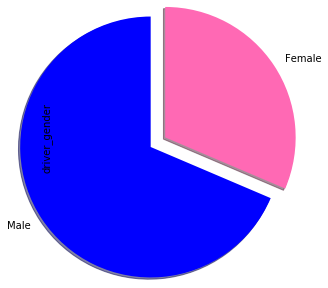

In [27]:
gender.plot.pie(explode=[0.2,0], labels = ['Male', 'Female'], colors = ['b','hotpink'], shadow = True, startangle=90, radius =1.5)

### Question( Groupby )

# 3. Does gender affect who gets searched during a stop ?

In [34]:
search_by_gender = df[df.search_conducted == True]['driver_gender'].value_counts()

# we can also use
# df.groupby('driver_gender').search_conducted.sum()

In [35]:
search_by_gender

M    2113
F     366
Name: driver_gender, dtype: int64

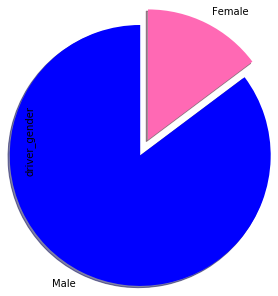

In [37]:
search_by_gender.plot.pie(explode=[0.2,0], labels = ['Male', 'Female'], colors = ['b','hotpink'], shadow = True, startangle=90, radius =1.5)

The above pie chart only shows the ratio of the male and female drivers who were searched but it does not answer our question since the number of male drivers are almost thrice the number of female drivers , so the majority of the drivers on whom the search was conducted were male.<br> We need to find the ratio of drivers on whom the search was conducted for each gender separately.

In [38]:
driver = df.driver_gender.value_counts()

In [39]:
driver

M    45164
F    16310
Name: driver_gender, dtype: int64

In [45]:
m = [driver['M'],search_by_gender['M']]
f = [driver['F'],search_by_gender['F']]

In [61]:
ml = (m[1]/m[0])*100
fl = (f[1]/f[0])*100

([<matplotlib.patches.Wedge at 0x1c993577e48>,
 [Text(-0.33587912546105253, -2.376380696159502, 'Not Searched'),
  Text(0.30788940229104694, 2.1783489426528666, 'Searched')])

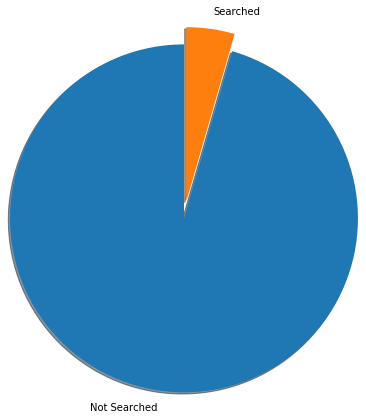

In [50]:
plt.pie(m,explode=[0.2,0], labels = ['Not Searched', 'Searched'], shadow = True, startangle=90, radius =2)

In [62]:
print('Percentage(%) of male drivers on whom search was conducted is',ml,'%')

Percentage(%) of male drivers on whom search was conducted is 4.678505003985475 %


([<matplotlib.patches.Wedge at 0x1c9935bcf08>,
 [Text(-0.16535053211843842, -2.3942972249760786, 'Not Searched'),
  Text(0.1515711284622294, 2.194772469532249, 'Searched')])

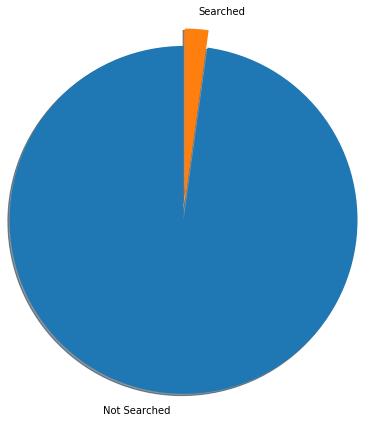

In [51]:
plt.pie(f,explode=[0.2,0], labels = ['Not Searched', 'Searched'], shadow = True, startangle=90, radius =2)

In [63]:
print('Percentage(%) of female drivers on whom search was conducted is',fl,'%')

Percentage(%) of female drivers on whom search was conducted is 2.244022072348253 %


In [65]:
print('Ratio of male to female:',ml/fl,': 1')

Ratio of male to female: 2.084874770901724 : 1


#### Hence, Male drivers are twice likely to be searched than the Female drivers.

### Question ( mapping + data-type casting)

# 4. What is the mean stop_duration ?

In [66]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [70]:
df.stop_duration.dtype

dtype('O')

In [81]:
df.stop_duration.value_counts()

0-15 Min     47379
16-30 Min    11448
30+ Min       2647
2                1
Name: stop_duration, dtype: int64

In [82]:
df[df.stop_duration=='2']

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
55873,1/23/2012,11:17,NaN,M,1960.0,52.0,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Passenger,True,2,False


In [83]:
df['stop_duration'] = df.stop_duration.map({'0-15 Min':7.5, '16-30 Min':24, '30+ Min':45, '2':2})

In [84]:
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,24.0,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False


In [86]:
df.stop_duration.mean()  # answer

12.187254981699878

### Question ( Groupby, Describe )

# 5. Compare the age distributions for each violation

In [88]:
df.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


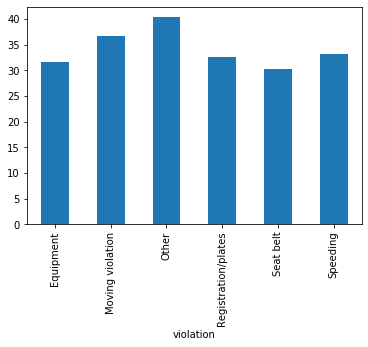

In [89]:
df.groupby('violation').driver_age.mean().plot.bar()